# Customer Churn Prediction using ANN

Link to the Youtube tutorial video: https://www.youtube.com/watch?v=MSBY28IJ47U&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=18


# Load the dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Load the dataset into a dataframe called df
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6910,0530-IJVDB,Male,0,No,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.60,7882.5,No
2009,7639-OPLNG,Male,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),79.25,5731.85,No
366,9069-LGEUL,Male,0,Yes,No,23,Yes,No,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No
5129,0620-DLSLK,Female,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,81.90,1028.9,No
5834,5055-MGMGF,Female,0,Yes,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.05,6914.95,No


# Data Preprocessing (Part 1)

In [3]:
# Drop the customerID feature/column from the df dataframe. Inplace is set as true so that after dropping customerID feature, it will update the same df dataframe.
df.drop('customerID', axis='columns', inplace=True)

# Show all the columns of df dataframe and their corresponding data type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# According to df.dtypes, TotalCharges is object type. This code also shows that TotalCharges is a string in 1D array
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
# Convert TotalCharges feature/column in df dataframe from a 1D array of string into a 1D array of number column (in the format of numpy series) using to_numeric(). errors='coerce' means the using to_numeric() will convert for whatever columns with ignoring errors (EG: NaN)
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
# isnull() will tell if the value of each row is null or not
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
# Show all samples in df dataset whose TotalCharges feature is null
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Access the Nth sample information using iloc[]. i means integer, loc means location.
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
# Check the value of TotalCharges feature of the Nth sample
df.iloc[488]["TotalCharges"]

' '

In [10]:
# Save all samples in df dataframe whose TotalCharges feature is not null to the new dataframe called df1
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
# Convert TotalCharges feature/column in df1 dataframe from a 1D array of string into a 1D array of number column (in the format of numpy series) using to_numeric(), then update to df1 dataframe.
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

# Confirm TotalCharges feature/column in df1 dataframe now is in the format of number column (numpy series)
df1.TotalCharges.dtypes

C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\1610378798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

# Data Visualization

## Histogram of Number of Customer vs Tenure 

Text(0.5, 1.0, 'Customer Churn Dataset Visualization (No. of Customer vs Tenure)')

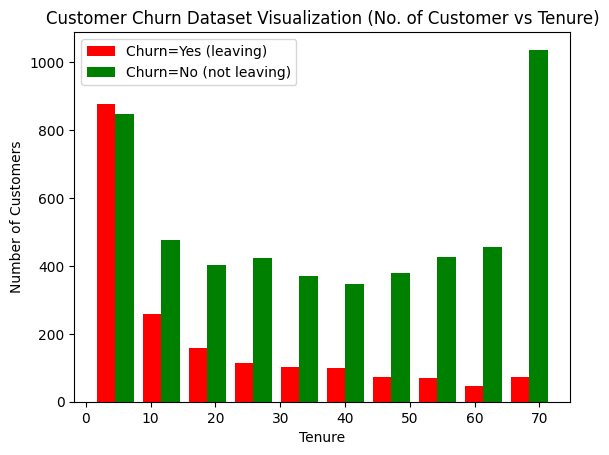

In [12]:
# Get the tenure feature values of samples/customers in df1 dataframe who are not leaving (churn=No), then save them into a numpy series called tenure_churn_no
tenure_churn_no = df1[df1.Churn=='No'].tenure

# Get the tenure feature values of samples/customers in df1 dataframe who are leaving (churn=Yes), then save them into a numpy series called tenure_churn_yes
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

# Plot a histogram with information of tenure_churn_no & tenure_churn_yes. Green for tenure_churn_yes, red for tenure_churn_no
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn=Yes (leaving)', 'Churn=No (not leaving)'])
plt.legend() # show the legend on the histogram
plt.xlabel('Tenure') # show the x-axis label on the histogram
plt.ylabel('Number of Customers') # show the y-axis label on the histogram
plt.title('Customer Churn Dataset Visualization (No. of Customer vs Tenure)') # show the title on the histogram

# Insights from the histogram: 
# 1) Majority of the customer with long tenure (with the company) are not leaving (Churn=No)
# 2) Majority of the customer with short tenure (with the company) are leaving (Churn=Yes)

## Histogram of Number of Customer vs Monthly Charge 

Text(0.5, 1.0, 'Customer Churn Dataset Visualization (No. of Customer vs Monthly Charge)')

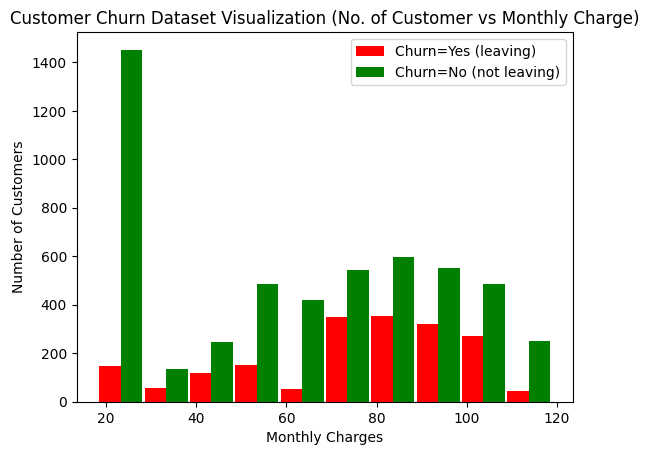

In [13]:
# Get the tenure feature values of samples/customers in df1 dataframe who are not leaving (churn=No), then save them into a numpy series called tenure_churn_no
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges

# Get the tenure feature values of samples/customers in df1 dataframe who are leaving (churn=Yes), then save them into a numpy series called tenure_churn_yes
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

# Plot a histogram with information of tenure_churn_no & tenure_churn_yes. Green for tenure_churn_yes, red for tenure_churn_no
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes (leaving)', 'Churn=No (not leaving)'])
plt.legend() # show the legend on the histogram
plt.xlabel('Monthly Charges') # show the x-axis label on the histogram
plt.ylabel('Number of Customers') # show the y-axis label on the histogram
plt.title('Customer Churn Dataset Visualization (No. of Customer vs Monthly Charge)') # show the title on the histogram

# Insights from the histogram: 
# 1) Majority of customers who are not leaving have low monthly charge 

# Data Preprocessing (Part 2)

## Data Cleaning

In [14]:
# Self-defined a function to print the unique values in the object-type categorical columns/features of the input dataframe
def print_unique_col_values(df):
    for column in df: # Iterate each column in the input dataframe
        if df[column].dtypes=='object': # If the column/feature is object type
            print(f'{column} : {df[column].unique()}') # Print its unique values using python f format string

# Show the unique values of each categorical column/feature in df1 dataframe
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
# Replace 'No internet service' with 'No' in df1 dataframe, then update/modify df1 dataframe (because 'No internet service' and 'No' has same meaning in this context)
df1.replace('No internet service', 'No', inplace=True) # Alternative way: df1 = df1.replace('No internet service', 'No')

# Replace 'No phone service' with 'No' in df1 dataframe, then update/modify df1 dataframe (because 'No phone service' and 'No' has same meaning in this context)
df1.replace('No phone service', 'No', inplace=True) 

# Show the unique values of each categorical column/feature in df1 dataframe
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\227830700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True) # Alternative way: df1 = df1.replace('No internet service', 'No')
C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\227830700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


Machine learning models do not understand text so we have to convert every text or a string type of column into a number

In [16]:
# Create a variable that contains the name of categorical columns/features whose unique values are 'Yes' and 'No'
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns: # Iterate each categrotical column name
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True) # Replace the unique values of the categorical column with 'Yes' with 1 & 'No' with 0 

# Show the unique values of each column/feature in df1 dataframe. # cannot use print_unique_col_values(df1) anymore because now most categorical columns are not object-type anymore
for col in df1: 
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\2395137406.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True) # Replace the unique values of the categorical column with 'Yes' with 1 & 'No' with 0
C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\2395137406.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

1) When a categorical variable only has 2 values, then just replace them with 0 and 1 respectively.     <br \>
2) When a categorical variable only more than 2 values, then just convert them into one-hot-encoding representation (to avoid the ranking effect deteriorate machine learning performance).     <br \>

In [17]:
# Replace 'Female' with '1' & 'Male' with '0' in df1 dataframe, then update/modify df1 dataframe.
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True) 

C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\595001316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
C:\Users\weiyo\AppData\Local\Temp\ipykernel_5100\595001316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [18]:
# Convert the unique values of 'InternetService', 'Contract' & 'PaymentMethod' features in df1 dataframe into one-hot-encoding representation. Then save the whole dataframe results into a new dataframe called df2.
df2 = pd.get_dummies(data = df1, columns= ['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3476,0,1,1,0,65,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6319,0,1,1,0,54,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1208,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1583,1,0,1,1,6,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [20]:
# Check the data types in df2 dataframe, ensure no object-type column (All values under the columns are in number format)
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

## Data Scaling

Ensure all features are on the same scale. Here, all feature values are on the scale between 0 and 1.

In [21]:
# Create a variable to store the name of columns required to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Create a scaler

# Scale the values of the column whose name is included in cols_to_scale variable, then update the scaled columns back to the df2 dataframe again.
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
546,0,0,1,1,0.535211,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2140,1,0,1,1,0.450704,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
6939,0,0,0,0,0.478873,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [22]:
# Show the unique values of each column/feature in df2 dataframe.
for col in df2: 
    print(f'{col}: {df2[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Data Spliiting

### Split the features and ground truth of the dataset as separate variables

In [23]:
# Save the features of the dataset into X variable
X = df2.drop('Churn', axis='columns')

# Save the ground truth of the dataset into Y variable
Y = df2['Churn']

### Split the features and ground truth into train and test sets

In [24]:
from sklearn.model_selection import train_test_split

# Spit the features and ground truth into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print('Number of samples in the train set: ', X_train.shape[0])
print('Number of features of each sample in the train set: ', X_train.shape[1])
print('Number of samples in the test set: ', X_test.shape[0])

Number of samples in the train set:  5625
Number of features of each sample in the train set:  26
Number of samples in the test set:  1407


# Develop a neural network

The neural network used in this tutorial is Artificial Neural Network (ANN), which consists of only 3 layers (an input layer, a hidden layer, and an output layer)

In [25]:
import tensorflow as tf
from tensorflow import keras

# Create the structure of the neural network
model = keras.Sequential([
    # The hidden layer (the 2nd layer), which consists of 20 neurons, with ReLU as the activation function. Before this layer is the input layer (the 1st layer, of shape/consists 26 input neurons) which receive 26 features from the train set. 
    keras.layers.Dense(20, input_shape = (26,), activation='relu'),
    # The output layer (the 3rd layer), which consists of 1 output neuron (to provide score if the customer churn) with sigmoid function as the activation function.
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the neural network
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # Binary cross entropy is used as the cost function because the ground truth of the dataset is binary (either 0 or 1)
              metrics = ['accuracy'])

# Train the neural network with 100 epochs. Practically, try low epochs to test if the currect neural network architecture and hyperparameters will cause the accuracy to increase. If yes, then only increase the epochs to get the satisfied accuracy.
model.fit(X_train, Y_train, epochs = 100)


Epoch 1/100


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6301 - loss: 0.6219
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: 0.4296
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7972 - loss: 0.4211
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4279
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8029 - loss: 0.4171
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.4282
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8091 - loss: 0.4039
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4185
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7988 - loss: 0.4207
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8107 - loss: 0.4057
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4110
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [26]:
# Evaluate the neural network using the test set
model.evaluate(X_test, Y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4449


[0.4512145221233368, 0.783226728439331]

In [27]:
# Make predictions using the neural network
Y_predicted = model.predict(X_test)
print('The predicted results:\n', Y_predicted[:5])

# Convert the predicted results into binary (0 or 1)
Y_predicted_binary = []
for element in Y_predicted:
    if element >= 0.5:
        Y_predicted_binary.append(1) # If the predicted result of the sample is >= 0.5, at the same sequence/index, record/store a 1 in the Y_predicted_binary variable
    else:
        Y_predicted_binary.append(0) # If the predicted result of the sample is < 0.5, at the same sequence/index, record/store a 0 in the Y_predicted_binary variable

print('\nThe converted predicted results:\n', Y_predicted_binary[:5])
print('\nThe ground truth of the corresponding samples:\n', Y_test[:5])

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
The predicted results:
 [[0.3339602 ]
 [0.71533513]
 [0.01114891]
 [0.79417086]
 [0.47236285]]

The converted predicted results:
 [0, 1, 0, 1, 0]

The ground truth of the corresponding samples:
 2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64


# Evaluate the performance of the neural network

## Print the classification report

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report is the statistics on the overal model (precision, recall, ....). The predicted results must has the same form of the ground truth [EG: binary here]
print(classification_report(Y_test, Y_predicted_binary))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.58      0.61       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.78      0.78      1407



## Print the confusion matrix

Text(95.72222222222221, 0.5, 'Ground Truth')

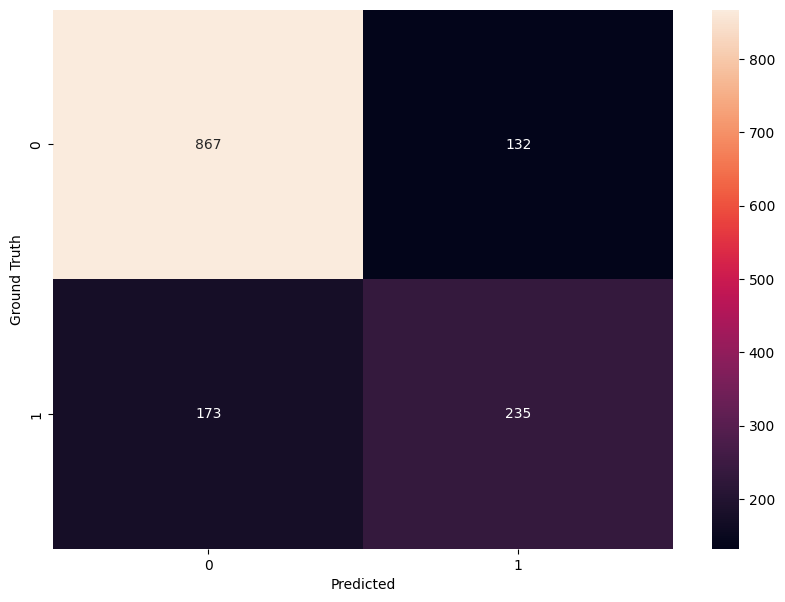

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_binary) # The input of labels is the ground truth of the test set, the input of predictions is the prediction results over the samples in test set (must have the same form as ground truth [EG: binary here])

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

# The values on the diagonal of the confusion matrix represents the number of correct prediction
# The values on the non-diagonal of the confusion matrix represents the number of wrong prediction (error)

# Manually calculate the metrics involved in the classification report

1) Accuracy is a metric that considers the model performance on all classes available in the dataset
2) Precision & recall are the metrics that consider the model performance on a specific/individual class available in the dataset
<img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />  <br />

## Accuracy

In [30]:
# Calculate the accuracy of the neural network manually (up to 2 decimal places)
accuracy_manually = (912+190) / (912+87+218+190)
print('The manually calculated accuracy (2 decimal places): ', round(accuracy_manually,2))
# Means out of all predictions (for all classes), 912 + 190 of them are correct, Resulting in accuracy of 0.78

The manually calculated accuracy (2 decimal places):  0.78


## Precision for class 0

In [31]:
# Calculate the precision of the neural network for class 0 manually (up to 2 decimal places)
precision_0_manually = 912 / (912+218)
print('The manually calculated precision of the neural network for class 0 (up to 2 decimal places): ', round(precision_0_manually,2))
# Means out of 912 + 218 samples predicted to be 0, only 912 of them are correct. Resulting in the precision of 0.81

The manually calculated precision of the neural network for class 0 (up to 2 decimal places):  0.81


## Precision for class 1

In [32]:
# Calculate the precision of the neural network for class 1 manually (up to 2 decimal places)
precision_1_manually = 190 / (87+190)
print('The manually calculated precision of the neural network for class 1 (up to 2 decimal places): ', round(precision_1_manually,2))
# Means out of 87 + 190 samples predicted to be 1, only 190 of them are correct. Resulting in the precision of 0.69

The manually calculated precision of the neural network for class 1 (up to 2 decimal places):  0.69


## Recall for class 0

In [33]:
# Calculate the recall of the neural network for class 0 manually (up to 2 decimal places)
recall_0_manually = 912 / (912+87)
print('The manually calculated recall of the neural network for class 0 (up to 2 decimal places): ', round(recall_0_manually,2))
# Means out of 912 + 87 samples whose ground truth is 0 (means the 912 + 87 samples has churn=0 in reality), only 912 of them are predicted correctly. Resulting in the recall of 0.91

The manually calculated recall of the neural network for class 0 (up to 2 decimal places):  0.91


## Recall for class 1

In [34]:
# Calculate the recall of the neural network for class 1 manually (up to 2 decimal places)
recall_1_manually = 190 / (218+190)
print('The manually calculated recall of the neural network for class 1 (up to 2 decimal places): ', round(recall_1_manually,2))
# Means out of 218 + 190 samples whose ground truth is 1 (means the 218 + 190 samples has churn=1 in reality), only 190 of them are predicted correctly. Resulting in the recall of 0.47

The manually calculated recall of the neural network for class 1 (up to 2 decimal places):  0.47


## F1-score for class 0

In [37]:
# Calculate the f1-score of the neural network for class 0 manually (up to 2 decimal places)
f1score_0_manually = 2 * (precision_0_manually * recall_0_manually) / (precision_0_manually + recall_0_manually)
print('The manually calculated F1-score of the neural network for class 0 (up to 2 decimal places): ', round(f1score_0_manually,2))

The manually calculated F1-score of the neural network for class 0 (up to 2 decimal places):  0.86


## F1-score for class 1

In [38]:
# Calculate the f1-score of the neural network for class 1 manually (up to 2 decimal places)
f1score_1_manually = 2 * (precision_1_manually * recall_1_manually) / (precision_1_manually + recall_1_manually)
print('The manually calculated F1-score of the neural network for class 1 (up to 2 decimal places): ', round(f1score_1_manually,2))

The manually calculated F1-score of the neural network for class 1 (up to 2 decimal places):  0.55
